In [1]:
%autosave 20
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Autosaving every 20 seconds


In [2]:
df=pd.read_csv("C:/Users/HP/OneDrive - Newcastle University/Dissertation/Data_sets/training_data.csv")
df=df.dropna()
print("sample before ",df.shape)

sample before  (377203, 6)


In [3]:
df.time.head(3)

0    2020-05-21 03:45:00
1    2020-05-30 18:44:00
2    2020-05-29 15:19:00
Name: time, dtype: object

In [4]:
df["time"]=pd.to_datetime(df["time"],infer_datetime_format=True,dayfirst=True)
df.to_csv("C:/Users/HP/OneDrive - Newcastle University/Dissertation/Data_sets/Data_with_proper_date.csv",mode='w',index=False)

In [5]:
# df["Date_new"]=pd.to_datetime(df["time"],infer_datetime_format=True,dayfirst=True)
df=pd.read_csv("C:/Users/HP/OneDrive - Newcastle University/Dissertation/Data_sets/Data_with_proper_date.csv")
df["time"]=pd.to_datetime(df["time"],infer_datetime_format=True,dayfirst=True)
df.shape

(377203, 6)

In [6]:
df["Date"]=[d.date() for d in df["time"]]
df["Date"]=pd.to_datetime(df["Date"],format="%Y/%m/%d")
df["Time"]=[d.time() for d in df["time"]]

In [7]:
df['Hour']=df['time'].dt.hour

In [8]:
df.head()

,Sensor,Type,Units,time,Flag,Value,Date,Time,Hour
0,PER_AIRMON_MESH301245,PM2.5,ugm -3,2020-05-21 03:45:00,0.0,5.640000,2020-05-21,03:45:00,3
1,PER_AIRMON_MESH1911150,PM10,ugm -3,2020-05-30 18:44:00,0.0,6.357000,2020-05-30,18:44:00,18
2,PER_AIRMON_MESH301245,PM10,ugm -3,2020-05-29 15:19:00,0.0,6.310000,2020-05-29,15:19:00,15
3,PER_AIRMON_MESH1911150,PM 4,ugm -3,2020-05-24 14:56:00,0.0,0.380000,2020-05-24,14:56:00,14
4,PER_EMOTE_1309,CO,ugm -3,2020-05-28 06:20:38,0.0,349.812463,2020-05-28,06:20:38,6


In [9]:
df12 = df[(df['Date'] > '2020-05-13') & (df['Date'] <= '2020-05-14')]
df12.head()

,Sensor,Type,Units,time,Flag,Value,Date,Time,Hour
17,PER_EMOTE_1309,CO,ugm -3,2020-05-14 11:53:00,0.0,257.791049,2020-05-14,11:53:00,11
20,PER_AIRMON_MESH1911150,PM2.5,ugm -3,2020-05-14 11:49:00,0.0,3.274000,2020-05-14,11:49:00,11
31,PER_EMOTE_1309,Humidity,%,2020-05-14 22:11:00,0.0,57.100000,2020-05-14,22:11:00,22
40,PER_EMOTE_1309,CO,ugm -3,2020-05-14 06:55:00,0.0,341.400232,2020-05-14,06:55:00,6
55,PER_AIRMON_MESH1911150,PM10,ugm -3,2020-05-14 22:36:00,0.0,6.188000,2020-05-14,22:36:00,22


In [10]:
df_false=df[df["Flag"]==1]
df_false.head()

,Sensor,Type,Units,time,Flag,Value,Date,Time,Hour
38,PER_AIRMON_MESH1911150,NO,ugm -3,2020-05-11 03:15:00,1.0,-7.86875,2020-05-11,03:15:00,3
126,PER_AIRMON_MESH1911150,NO,ugm -3,2020-05-17 16:30:00,1.0,-11.10000,2020-05-17,16:30:00,16
371,PER_AIRMON_MESH1911150,NO,ugm -3,2020-05-14 13:45:00,1.0,-10.70500,2020-05-14,13:45:00,13
445,PER_AIRMON_MESH301245,NO,ugm -3,2020-05-20 21:15:00,1.0,-0.13000,2020-05-20,21:15:00,21
452,PER_AIRMON_MESH301245,NO,ugm -3,2020-05-28 16:45:00,1.0,-1.01750,2020-05-28,16:45:00,16


In [11]:
df_false.Sensor.unique()

array(['PER_AIRMON_MESH1911150', 'PER_AIRMON_MESH301245',
       'PER_EMOTE_1309'], dtype=object)

In [12]:
df_false.Type.unique()

array(['NO', 'NO2'], dtype=object)

In [13]:
len(df_false[df_false["Type"]=="NO"])
len(df_false[df_false["Type"]=="NO2"])

1883

125

In [14]:
df.head()

,Sensor,Type,Units,time,Flag,Value,Date,Time,Hour
0,PER_AIRMON_MESH301245,PM2.5,ugm -3,2020-05-21 03:45:00,0.0,5.640000,2020-05-21,03:45:00,3
1,PER_AIRMON_MESH1911150,PM10,ugm -3,2020-05-30 18:44:00,0.0,6.357000,2020-05-30,18:44:00,18
2,PER_AIRMON_MESH301245,PM10,ugm -3,2020-05-29 15:19:00,0.0,6.310000,2020-05-29,15:19:00,15
3,PER_AIRMON_MESH1911150,PM 4,ugm -3,2020-05-24 14:56:00,0.0,0.380000,2020-05-24,14:56:00,14
4,PER_EMOTE_1309,CO,ugm -3,2020-05-28 06:20:38,0.0,349.812463,2020-05-28,06:20:38,6


In [15]:
# fig, ax = plt.subplots(figsize=(15, 8))
# plt.rcParams['agg.path.chunksize'] = 10000
# # Add x-axis and y-axis
# ax.plot(df['Type'],df['Value'])
# ax.legend(df['Type'])

In [16]:
newdf=df.loc[df["Type"]=="CO"]
newdf.head()

,Sensor,Type,Units,time,Flag,Value,Date,Time,Hour
4,PER_EMOTE_1309,CO,ugm -3,2020-05-28 06:20:38,0.0,349.812463,2020-05-28,06:20:38,6
6,PER_EMOTE_1309,CO,ugm -3,2020-05-19 09:25:21,0.0,533.156084,2020-05-19,09:25:21,9
17,PER_EMOTE_1309,CO,ugm -3,2020-05-14 11:53:00,0.0,257.791049,2020-05-14,11:53:00,11
19,PER_EMOTE_1309,CO,ugm -3,2020-05-17 11:32:17,0.0,327.744630,2020-05-17,11:32:17,11
22,PER_EMOTE_1309,CO,ugm -3,2020-05-17 21:24:18,0.0,367.877002,2020-05-17,21:24:18,21


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Date'),
 Text(0.5, 1.0, 'Daily count of data')]

No handles with labels found to put in legend.


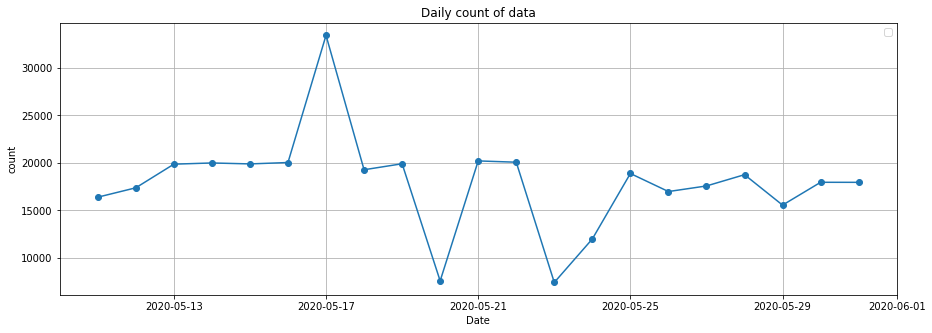

In [17]:
df_Date_count= df.groupby("Date")["Date"].count()
fig,ax= plt.subplots(figsize=(15,5))
pd.plotting.register_matplotlib_converters()
# plt.rcParams['agg.path.chunksize'] = 1000
# df_Date_count.plot()
plt.plot(df_Date_count,marker='o')
# ax.annotate()
# plt.text()
ax.set(title="Daily count of data",  xlabel="Date", ylabel="count")
plt.legend()
plt.grid()
plt.show()
# ax.legend(newdf['Type'])

In [18]:
df_Date_count.head(10)

Date
2020-05-11    16397
2020-05-12    17383
2020-05-13    19867
2020-05-14    19995
2020-05-15    19895
2020-05-16    20040
2020-05-17    33408
2020-05-18    19281
2020-05-19    19910
2020-05-20     7598
Name: Date, dtype: int64

In [19]:
df.groupby(["Date","Sensor"])["Date"].count().reset_index(name="count")

,Date,Sensor,count
0,2020-05-11,PER_AIRMON_MESH1911150,5785
1,2020-05-11,PER_AIRMON_MESH301245,5218
2,2020-05-11,PER_EMOTE_1309,5394
3,2020-05-12,PER_AIRMON_MESH1911150,5864
4,2020-05-12,PER_AIRMON_MESH301245,3908
...,...,...,...
58,2020-05-30,PER_AIRMON_MESH301245,5736
59,2020-05-30,PER_EMOTE_1309,6678
60,2020-05-31,PER_AIRMON_MESH1911150,5778
61,2020-05-31,PER_AIRMON_MESH301245,5424


In [20]:
# daily_sensor_count[daily_sensor_count.Date=='2020-06-03']

In [21]:
daily_sensor_count=df.groupby(["Date","Sensor"])["Date"].count().reset_index(name="count")
daily_sensor_count.head()

,Date,Sensor,count
0,2020-05-11,PER_AIRMON_MESH1911150,5785
1,2020-05-11,PER_AIRMON_MESH301245,5218
2,2020-05-11,PER_EMOTE_1309,5394
3,2020-05-12,PER_AIRMON_MESH1911150,5864
4,2020-05-12,PER_AIRMON_MESH301245,3908


In [22]:
def combinedPlot(c1,c2,position):
    fig, ax = plt.subplots(figsize=(10,5))
    df.groupby([c1,c2])[c1].count().unstack().plot(ax=ax,kind="bar",stacked=True)
    ax.legend(loc=position,ncol=2, fancybox=True, shadow=True)
    plt.xticks(rotation=80)
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.title(c2+" wrt "+c1)
    plt.show()

#     df.groupby(["Date","Sensor"])["Date"].count().reset_index(name="count")

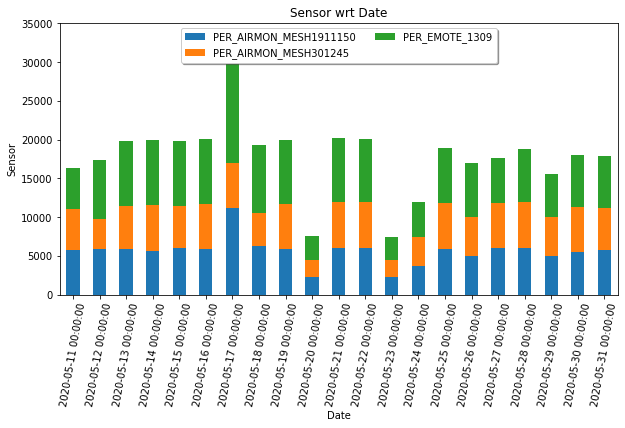

In [23]:
combinedPlot("Date","Sensor","upper center")

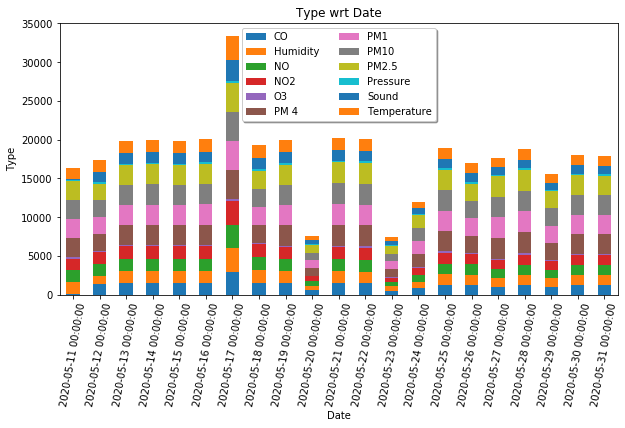

In [24]:
combinedPlot("Date","Type","upper center")

In [25]:
def individualTypePlot(c1,c2,position):
    fig, ax = plt.subplots(figsize=(10,6))
    newdf=df.loc[df[c2]=="CO"]
    
    df.groupby([c1,c2])[c1].count().unstack().plot(ax=ax,kind="bar",stacked=True)
    ax.legend(loc=position,ncol=2, fancybox=True, shadow=True)
    plt.xticks(rotation=80)
    plt.xlabel(c1)
    plt.ylabel(c2)
    plt.title(c2+" wrt "+c1)
    plt.show()

In [26]:
newdf=df.loc[df["Type"]=="CO"]
newdf.head(2)

,Sensor,Type,Units,time,Flag,Value,Date,Time,Hour
4,PER_EMOTE_1309,CO,ugm -3,2020-05-28 06:20:38,0.0,349.812463,2020-05-28,06:20:38,6
6,PER_EMOTE_1309,CO,ugm -3,2020-05-19 09:25:21,0.0,533.156084,2020-05-19,09:25:21,9


In [27]:
newdf_1=newdf[["Hour","Type","Value"]]
newdf_1.head()

,Hour,Type,Value
4,6,CO,349.812463
6,9,CO,533.156084
17,11,CO,257.791049
19,11,CO,327.744630
22,21,CO,367.877002


In [28]:
# newdf_1.plot(x="Hour",y="Value")

In [29]:
newdf_1.set_index("Hour")

,Type,Value
Hour,,
6,CO,349.812463
9,CO,533.156084
11,CO,257.791049
11,CO,327.744630
21,CO,367.877002
...,...,...
16,CO,331.220938
10,CO,293.084744
5,CO,303.519399


In [30]:
# import seaborn as sns
# # Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(11, 4)})
# newdf_1["Value"].plot(linewidth=0.5)

In [31]:
df_123=df.drop(["Flag"],axis=1)
n=df_123.groupby(["Date","Hour","Type"]).mean()

In [32]:
n.head()

Value
Date       Hour Type               
2020-05-11 1    CO        61.967400
                Humidity  64.608163
                NO        17.896063
                NO2        5.144135
                O3        31.924167

In [33]:
df_123=df.drop(["Flag"],axis=1)
o=df_123.loc[df_123["Date"]=="2020-05-11"]
p=o.groupby(["Hour","Type"])["Value"].mean()

In [34]:
p.head()
q=p.unstack()

Hour  Type    
1     CO          61.967400
      Humidity    64.608163
      NO          17.896063
      NO2          5.144135
      O3          31.924167
Name: Value, dtype: float64

Type,CO,Humidity,NO,NO2,O3,PM 4,PM1,PM10,PM2.5,Pressure,Sound,Temperature
Hour,,,,,,,,,,,,
1,61.967400,64.608163,17.896063,5.144135,31.924167,4.165364,2.024900,9.123345,4.156318,1026.716667,57.6,4.773469
2,56.758223,66.585294,14.824185,5.419156,31.774500,4.288750,2.096795,9.323562,4.267179,1026.787500,NaN,4.597059
3,58.115334,67.461765,30.029513,2.977916,32.361000,3.997679,1.950804,8.922509,4.056938,1026.837500,NaN,4.344118
4,46.773823,65.250000,15.916232,2.300215,33.000750,4.019286,1.968286,8.884143,4.088152,1026.875000,NaN,4.710294
5,60.183490,66.489552,16.874679,2.627687,31.424375,4.103571,2.112991,9.332893,4.168375,1026.812500,NaN,4.632836


TypeError: no numeric data to plot

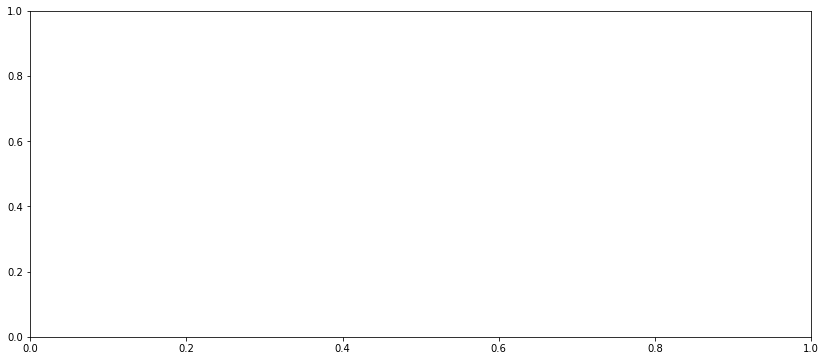

In [35]:
q.head()
# q.plot()
# plt.show()
# fig, ax = plt.subplots(figsize=(12,5))
# _=plt.plot(q,label=("CO","Humidity","NO"));
# ax.legend()
# # ax.plot(q);
# plt.show()


fig, ax = plt.subplots(figsize=(14,6))
o=df.loc[df["Date"]=="2020-06-01"]
_=o.groupby(["Hour","Type"])["Value"].mean().unstack().plot(ax=ax)
_=ax.set_xticks([i for i in range(0,24)])
ax.grid()
ax.legend(loc="center left",ncol=3, fancybox=True, shadow=True)
# df.groupby([c1,c2])[c1].count().unstack().plot(ax=ax,kind="bar",stacked=True)
# ax.legend(loc=position,ncol=2, fancybox=True, shadow=True)

In [36]:
def hourly_plot(date,type_data):
    fig, ax = plt.subplots(figsize=(14,5))
    o=df.loc[df["Date"]==date]
    q=o.groupby(["Hour","Type"])["Value"].mean().unstack()
    for i in range(0,len(type_data)):
        ax.plot(q[type_data[i]],label=type_data[i])
    ax.legend(loc="upper left",ncol=3, fancybox=True, shadow=True)
    plt.xlabel("Hour")
    ax.grid()
    plt.ylabel("Value")
    plt.title("Various types wrt hours of "+date )
    ax.set_xticks([i for i in range(0,24)])

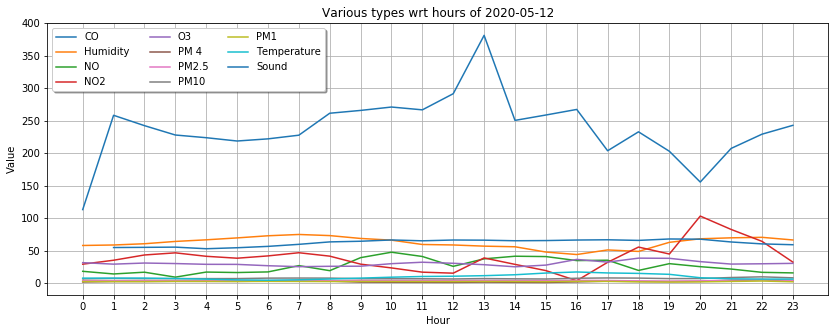

In [37]:
cols=["CO","Humidity","NO","NO2","O3","PM 4","PM2.5","PM10","PM1","Temperature","Sound"]
hourly_plot("2020-05-12",cols)
plt.show()

In [38]:
# df.drop(df[df["Date"]=="2020-05-31"].index, inplace = True)
# df.drop(df[df['Age'] < 25].index, inplace = True) 

In [ ]:
df.shape